# HW4, CHEE 6397 (Data-Driven Materials Modeling)

#### **Topics**: Deep Learning

#### **Due**: December 7, 2023


## Instructions

- The file you submit should be named as `hw4-<FirstName>_<LastName>-<UHID>.ipynb`, e.g. `hw4-Mingjian_Wen-00001111.ipynb`.
- Input your answer to each question in the `Answer` cell. Feel free add to more cells as needed.

### Markdown and Math

- You can use `markdown` cell to type the text part of your answers to a question. And math equations can be typed using LaTex.
- See https://gtribello.github.io/mathNET/assets/notebook-writing.html for a quick intro to markdown in Jupyter and how to write math equations.
- See https://ia.wikipedia.org/wiki/Wikipedia:LaTeX_symbols for a list of LaTex symbols.
- If you are more used to MS Word equation typesetting, you can find a graphical LaTex equations generator at: https://latexeditor.lagrida.com

### Code

- Your Python code to a question can be written using the `code` cell.
- Make sure all used packages are imported properly. For example, before submission, do `Kernel->Restart and Run All Cells...` from the menu bar to double check. If we cannot run your notebook, we won't be able to grade it.


## Scores

- a [5 points]: 
- b [10 points]:
- c [5 points]:
- d [10 points]:
- e [15 points]:
- f [10 points]:
- g [20 points]:
- h [10 points]:
- i [10 points]: 
- j [5 points]:  

Total: 


---
---


## Problem

In this problem, we will train an MLP for the classification of the reaction reaction family data used in HW3.  

### (a)

Load your dataset features as `X` and labels (reaction family) as `y`. Convert them into PyTorch `tensors`.
What are the **data type** of `X` and `y`?

Note, DON'T use the data file from HW3. (I've changed the label be to 0-based in HW 4 from 1-based in HW3.)

### Answer


In [77]:
import torch
import numpy as np

In [78]:
X = np.load("reaction_features_finetuned-hw4.npy")
y = np.load("reaction_super_family_finetuned-hw4.npy")
X = torch.tensor(X)
y = torch.tensor(y)
type(y)

torch.Tensor

X and y are both tensor data types

### (b)

- Plot a histogram of the number of samples in each reaction family.
- How many different reaction families are there in the dataset?

### Answer 

In [79]:
print(torch.unique(y))
print(torch.bincount(y))

tensor([0, 1, 2, 3, 4, 5, 6, 7])
tensor([1368,  785,  493,  781,  296,   99,  184,  486])


Text(0, 0.5, 'number of samples')

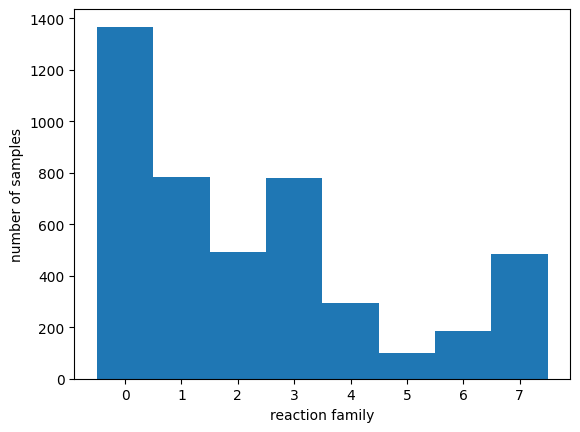

In [90]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(y, bins=[0,1,2,3,4,5,6,7,8], align='left')
ax.set_xlabel("reaction family")
ax.set_ylabel("number of samples")

There are 8 different reaction families in the dataset, ranging from 0 to 7.

### (C)

Split the dataset into training/validation/test sets with a ratio of 0.8/0.1/0.1. After the split, you should have `X_train`, `y_train`, `X_val`, `y_val`, `X_test`, and `y_test`.
Hint: 
- again, you can use `sklearn.model_selection.train_test_split`.
- you might want to set the random seed to a fixed value for reproducibility.


### Answer 

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_remain, y_train, y_remain = train_test_split(X,y,train_size = 0.8, random_state = 20)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size = 0.5, random_state = 20) 
print("Training set:\n\tfeatures: {} \n\ttarget: {}".format(X_train.shape,y_train.shape))
print("Validation set:\n\tfeatures: {} \n\ttarget: {}".format(X_val.shape,y_val.shape))
print("Test set:\n\tfeatures: {} \n\ttarget: {}".format(X_test.shape,y_test.shape))


Training set:
	features: torch.Size([3593, 128]) 
	target: torch.Size([3593])
Validation set:
	features: torch.Size([449, 128]) 
	target: torch.Size([449])
Test set:
	features: torch.Size([450, 128]) 
	target: torch.Size([450])


### (d)

Create three [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) using the below provided `ReactionDataset` class:
- `train_loader` for the training set, 
- `val_loader` for the validation set, and
- `test_loader` for the test set.


In `lab5-intro_pytorch.ipynb`, we directly iterated over the data without using a dataloader when training the toy model. 
But using a dataloader is more convenient and flexible, giving you more control over the data loading process.
For a brief tutorial on using dataloader, see https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [82]:
from torch.utils.data import Dataset

class ReactionDataset(Dataset):
    """Reaction dataset.

    Args:
        X: The features.
        y: The labels.
    """
    def __init__(self, X, y):

        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


### Answer


In [91]:
from torch.utils.data import DataLoader
train_data = ReactionDataset(X_train, y_train)
test_data = ReactionDataset(X_test, y_test)
val_data = ReactionDataset(X_val, y_val)
train_loader = DataLoader(train_data)
val_loader = DataLoader(val_data)
test_loader = DataLoader(test_data)

### (e)

Build an MLP model `MyMLP` with **two hidden layers** for the classification task. Hint: 
- refer to `lab5-intro_pytorch.ipynb` for a simple MLP model; note there is only one hidden layer in that example.

The number of input nodes and output nodes of your MLP model should be fixed. What are they, and why? 

### Answer
The number of input nodes represent the dimensionality of the inputs (features). Since the number/dimension of features for a model is fixed, the number of input nodes should be fixed as well. In this model, the number of input nodes is the number of features in the dataset.

The number of output nodes is the number of output classes. Since the number of classes/labels for a model is fixed, the number of output nodes should be fixed as well.


In [118]:
import torch.nn as nn

class MyTwoLayerMLP(nn.Module):

    def __init__(self, num_input_nodes, num_hidden1_nodes, num_hidden2_nodes, num_out_nodes):
        # call the parent class's __init__ method to initialize inherited attribute
        super().__init__()

        self.num_input_nodes = num_input_nodes
        self.num_hidden1_nodes = num_hidden1_nodes
        self.num_hidden2_nodes = num_hidden2_nodes
        
        self.num_out_nodes = num_out_nodes

        # input parameter: number of input nodes and output nodes (hidden nodes are output nodes in intermediate layers)
        self.layer1 = nn.Linear(num_input_nodes, num_hidden1_nodes)
        self.layer2 = nn.Linear(num_hidden1_nodes, num_hidden2_nodes)
        self.output_layer = nn.Linear(num_hidden2_nodes, num_out_nodes)

    def forward(self, X):
        h = torch.relu(self.layer1(X))
        h = torch.relu(self.layer2(h))
        output = torch.softmax(self.output_layer(h), dim = 1)
        # output = self.output_layer(hc)
        return output

### (f)

1. In part (e), what is the activation function you used for the hidden layers? Why you chose it over other options?

2. Do you add an activation function to the output layer? Why or why not?

### Answer

1. The activation function for the hidden layers are Rectified Linear Unit (ReLU). The ReLU is computationally efficient and widely used in practice. It also produce sparse activations and mitigate vanishing/exploding gradient problems.

2. The activation function to the output layer is softmax, which is commonly used for multi-class classification tasks. The function converts the output scores into a probability distribution over multiple labels, which are useful for multi-class problems.

### (g)


Train your MLP model using the training set. Feel free to use the below provided `train_multi_epoch` function.

- For classification, we use the cross entropy as the loss. In pytorch there are two cross entropy class: [BCELossWithLogits](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) and [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html). Which one should we use for this problem? Why?
- Use the `Adam` optimizer.
- You can use `torch.manual_seed()` function to set the random seed for reproducibility (before initializing your model). Sometimes, the model performance can be sensitive to the random seed. If you find your model performance is not stable, you can try different random seeds to see if it helps.
- Use the below hyperparameters:
  - for both hidden layers, using 10 nodes
  - learning rate: 0.001 (in optimizer)
  - batch size: 32 (in dataloader)
  - number of epochs (1 epoch means iterating over all data points in the training set once): 200 

In [100]:
def train_one_step(model, optimizer, loss_fn, X, y):
    """Train for a single step.

    Args:
        model: the model to train
        optimizer: the optimizer to use
        loss_fn: the loss function to use
        X: the input data
        y: the target data
    """
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

def train_multiple_epochs(model,  optimizer, loss_fn, train_loader, X_train, y_train, X_val, y_val, num_epochs):
    """
    Train the model for multiple epochs.

    Args:
        model: the model to train
        optimizer: the optimizer to use
        loss_fn: the loss function to use
        train_loader: the training data loader
        X_train: the entire training data
        y_train: the entire training labels
        X_val: the entire validation data
        y_val: the entire validation labels
        num_epochs: the total number of epochs to train for

    Returns:
        train_losses: the training losses for each epoch
        val_losses: the validation losses for each epoch
    """
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        for X_i, y_i in train_loader:
            train_one_step(model, optimizer, loss_fn, X_i, y_i)

        train_loss = loss_fn(model(X_train), y_train).item()
        val_loss = loss_fn(model(X_val), y_val).item()

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses

### Answer 

* CrossEntropyLoss is more suitable to this dataset because the dataset is multi-class and the MLP model uses softmax activation function. The BCEWithLogitsLoss is more suitable with binary classification problems.

In [121]:
import torch.optim as optim

input_node = 128
output_node = 8
hidden1 = 10
hidden2 = 10
l_rate = 0.001
batch_size = 32
epoch_num = 200

my_model = MyTwoLayerMLP(input_node, hidden1, hidden2, output_node)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(my_model.parameters(), lr = l_rate)
train_loss, val_Loss = train_multiple_epochs(my_model, optimizer, loss_func, train_loader, X_train, y_train, X_val, y_val, 200)
torch.manual_seed(13)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\phatt\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\phatt\AppData\Local\Temp\ipykernel_24484\1111362423.py", line 14, in <module>
    train_loss, val_Loss = train_multiple_epochs(my_model, optimizer, loss_func, train_loader, X_train, y_train, X_val, y_val, 200)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\phatt\AppData\Local\Temp\ipykernel_24484\1540312825.py", line 42, in train_multiple_epochs
    train_one_step(model, optimizer, loss_fn, X_i, y_i)
  File "C:\Users\phatt\AppData\Local\Temp\ipykernel_24484\1540312825.py", line 16, in train_one_step
    optimizer.step()
  File "c:\Users\phatt\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\optim\optimizer.py", line 373, in wrapper
    out =

### (h)

Plot the training loss and validation loss as a function of the epoch number. 

Based on the plot, what is the best epoch number to stop the training? Why?

Text(0, 0.5, 'loss')

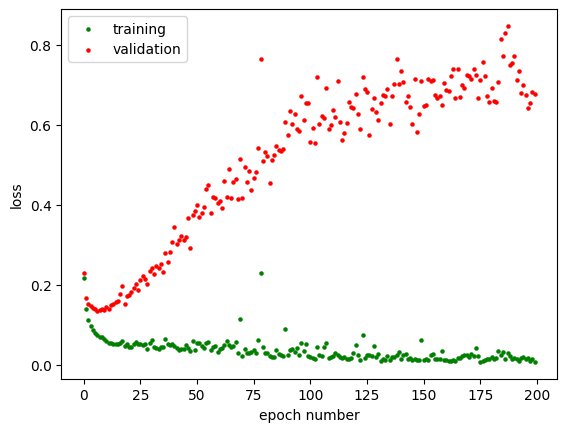

In [120]:
fig, ax = plt.subplots()
ax.scatter(list(range(epoch_num)), train_loss, s = 5, c = 'green', label = 'training')
ax.scatter(list(range(epoch_num)), val_Loss, s = 5, c = 'red', label = 'validation')
ax.legend()
ax.set_xlabel("epoch number")
ax.set_ylabel("loss")

### Answer 

### (i)

Above in part (g), we used a set of hyperparameters to train the model. Now, we will try to find a better set of hyperparameters.

- Tune the hyperparameters mentioned in part (g) to improve the model performance. You can try different values for each hyperparameter. Recall the best hyperparameters you found would be the ones that give the best performance on the validation set.  

Can you find a set of hyperparameters that give a better performance than the one in part (g)? If yes, what are they? If not, why?

Text(0, 0.5, 'loss')

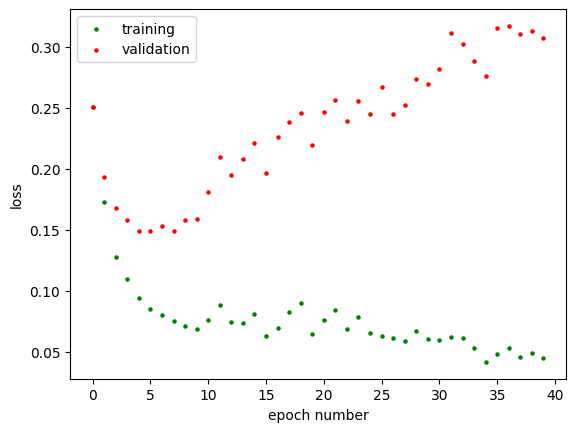

In [117]:
l_rate = 0.001
batch_size = 128
epoch_num = 40

my_model = MyTwoLayerMLP(input_node, hidden1, hidden2, output_node)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(my_model.parameters(), lr = l_rate)
train_loss, val_loss = train_multiple_epochs(my_model, optimizer, loss_func, train_loader, X_train, y_train, X_val, y_val, epoch_num)

fig, ax = plt.subplots()
ax.scatter(list(range(epoch_num)), train_loss, s = 5, c = 'green', label = 'training')
ax.scatter(list(range(epoch_num)), val_loss, s = 5, c = 'red', label = 'validation')
ax.legend()
ax.set_xlabel("epoch number")
ax.set_ylabel("loss")

### Answer

### (j)

For the best model you found in part (i), evaluate its performance on the test set. If you cannot find a better model in part (i), use the model in part (g).

### Answer